## Quick Fix: If you get import errors, run this cell instead:

```python
!pip install xgboost
!pip install lightgbm  
!pip install imbalanced-learn
!pip install missingno
```

Then restart the kernel (Kernel → Restart) and run all cells again.


In [1]:
# SIMPLE INSTALLATION (Use this if the automatic install doesn't work)
# Run this cell to install all required packages

%pip install xgboost
%pip install lightgbm
%pip install imbalanced-learn
%pip install missingno

print("\n✓ Installation complete! Please restart the kernel (Kernel → Restart) before continuing.")


  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 3.7 MB/s eta 0:00:20
   - -------------------------------------- 1.8/72.0 MB 3.6 MB/s eta 0:00:20
   - -------------------------------------- 2.6/72.0 MB 3.6 MB/s eta 0:00:20
   - -------------------------------------- 3.1/72.0 MB 3.6 MB/s eta 0:00:20
   -- ------------------------------------- 3.9/72.0 MB 3.4 MB/s eta 0:00:20
   -- ------------------------------------- 4.7/72.0 MB 3.5 MB/s eta 0:00:20
   --- ------------------------------------ 5.8/72.0 MB 3.6 MB/s eta 0:00:19
   --- ------------------------------------ 6.3/72.0 MB 3.6 MB/s eta 0:00:19
   --- ------------------------------------ 7.1/72.0 MB 3.6 MB/s eta 0:00:18
   ---- ----------------------------------- 7.9/72.0 MB 3.6 MB/s eta 0:00:18
   ---- ------------

# Ad Click Prediction - Enhanced Version
This notebook includes improvements for better accuracy:
- Advanced feature engineering
- Better missing value handling
- Hyperparameter tuning
- Ensemble methods
- Cross-validation
- Feature importance analysis


In [2]:
# Install required packages (run this cell first if you get import errors)
# Alternative: Run this command in terminal: pip install xgboost lightgbm imbalanced-learn missingno

import subprocess
import sys

# List of packages to install (package name for pip, module name for import check)
packages = [
    ('xgboost', 'xgboost'),
    ('lightgbm', 'lightgbm'),
    ('imbalanced-learn', 'imblearn'),  # pip name vs import name
    ('missingno', 'missingno')
]

print("Checking and installing required packages...\n")

for pip_name, import_name in packages:
    try:
        # Try to import the module
        __import__(import_name)
        print(f"✓ {pip_name} is already installed")
    except ImportError:
        print(f"Installing {pip_name}...")
        try:
            # Install using pip
            subprocess.check_call(
                [sys.executable, "-m", "pip", "install", pip_name],
                stdout=subprocess.DEVNULL,
                stderr=subprocess.PIPE
            )
            print(f"✓ {pip_name} installed successfully")
        except subprocess.CalledProcessError as e:
            print(f"✗ Error installing {pip_name}. Try running manually: pip install {pip_name}")
            print(f"  Error: {e.stderr.decode() if e.stderr else 'Unknown error'}")

print("\n✓ Package installation complete!")
print("Note: If you see any errors above, restart the kernel and try again.")


Checking and installing required packages...

✓ xgboost is already installed
✓ lightgbm is already installed
✓ imbalanced-learn is already installed
✓ missingno is already installed

✓ Package installation complete!
Note: If you see any errors above, restart the kernel and try again.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Install missing packages if needed
import subprocess
import sys

def install_package(package):
    """Install a package if it's not already installed"""
    try:
        __import__(package)
        print(f"✓ {package} is already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✓ {package} installed successfully")

# Install required packages
required_packages = {
    'xgboost': 'xgboost',
    'lightgbm': 'lightgbm',
    'imblearn': 'imbalanced-learn',
    'sklearn': 'scikit-learn'
}

print("Checking and installing required packages...")
for module_name, package_name in required_packages.items():
    try:
        if module_name == 'imblearn':
            import imblearn
        elif module_name == 'sklearn':
            import sklearn
        else:
            __import__(module_name)
        print(f"✓ {package_name} is already installed")
    except ImportError:
        print(f"Installing {package_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"✓ {package_name} installed successfully")

print("\nAll packages ready!")


Checking and installing required packages...
✓ xgboost is already installed
✓ lightgbm is already installed
✓ imbalanced-learn is already installed
✓ scikit-learn is already installed

All packages ready!


In [4]:
# Load the dataset
data = pd.read_csv(r"ad_click_dataset.csv")
print(f"Dataset shape: {data.shape}")
data.head()


Dataset shape: (10000, 9)


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [5]:
# Basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [6]:
# Statistical summary
data.describe()


,id,age,click
count,10000.000000,5234.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,13.126420,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


## Exploratory Data Analysis


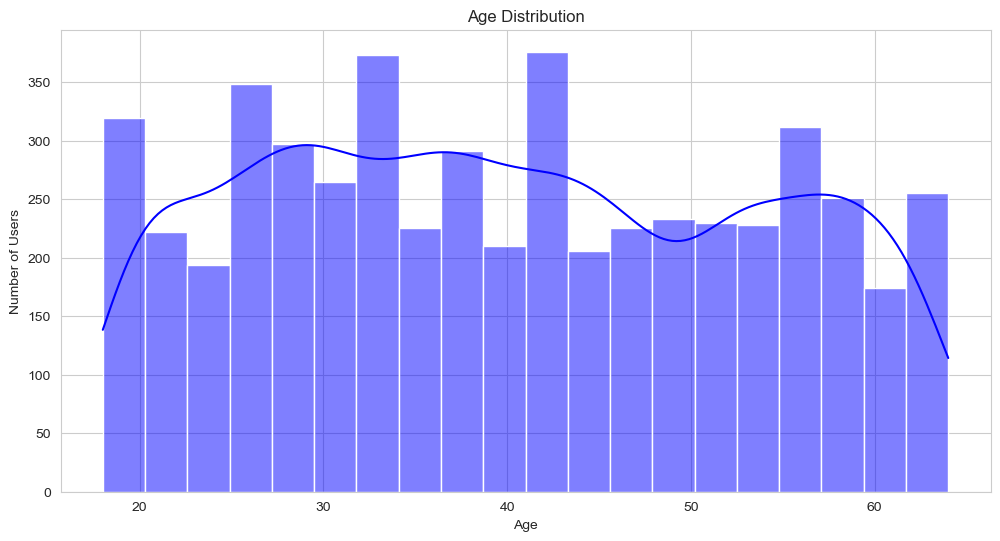

In [7]:
# Age distribution
sns.histplot(data['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()


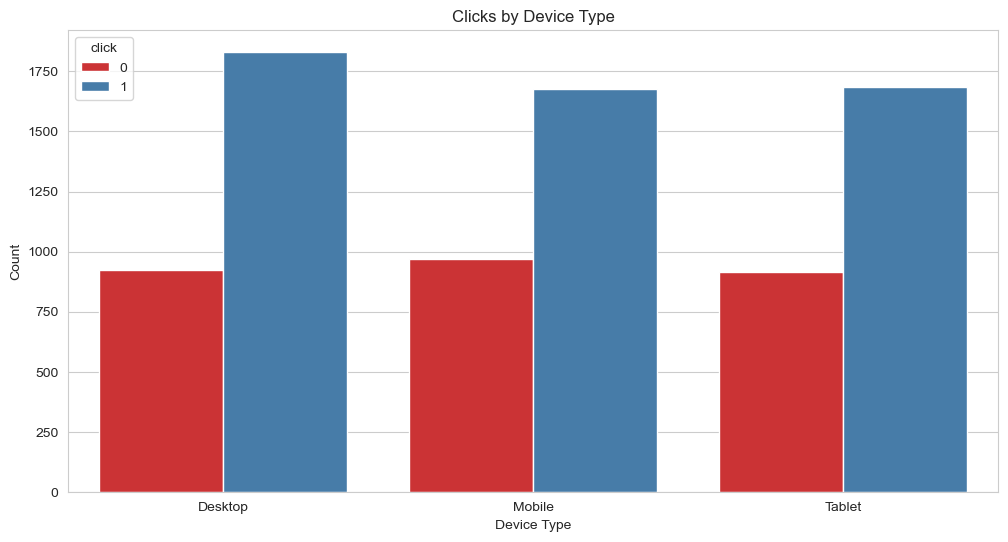

In [8]:
# Click rate by device type
sns.countplot(x='device_type', hue='click', data=data, palette='Set1')
plt.title("Clicks by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()


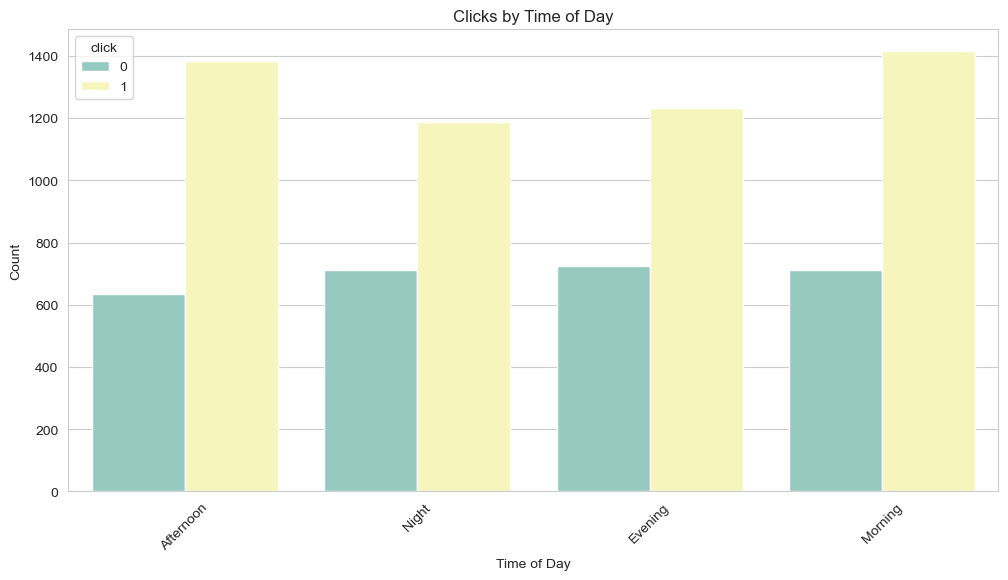

In [9]:
# Click rate by time of day
sns.countplot(x='time_of_day', hue='click', data=data, palette='Set3')
plt.title("Clicks by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


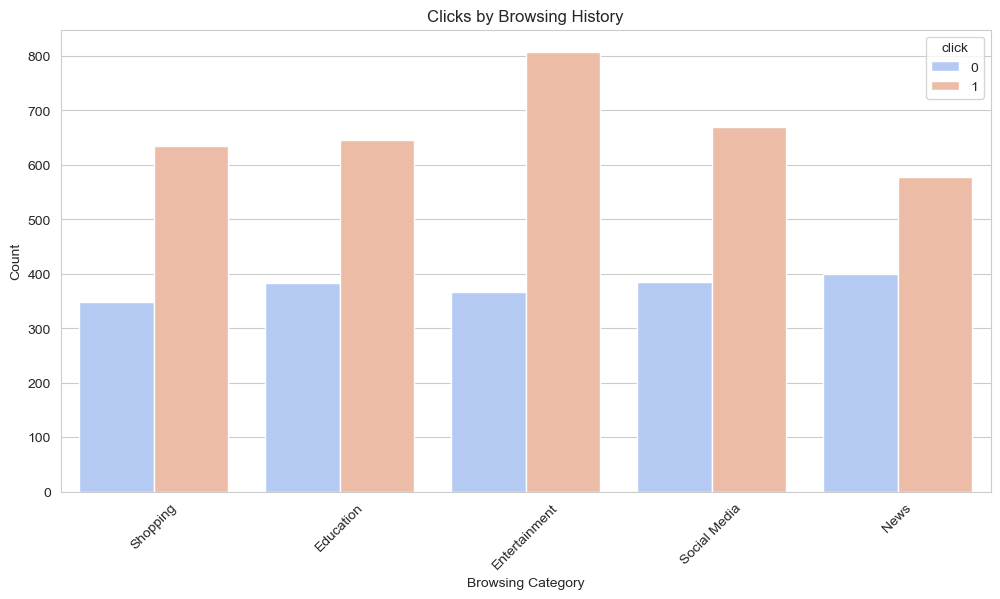

In [10]:
# Click rate by browsing history
sns.countplot(x='browsing_history', hue='click', data=data, palette='coolwarm')
plt.title("Clicks by Browsing History")
plt.xlabel("Browsing Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Missing Value Analysis


In [11]:
# Analyze missing values
missing_count = data.isna().sum()
missing_percent = (data.isna().mean() * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])


                  Missing Count  Missing Percentage
age                        4766               47.66
gender                     4693               46.93
device_type                2000               20.00
ad_position                2000               20.00
browsing_history           4782               47.82
time_of_day                2000               20.00


## Data Preprocessing - Enhanced


In [12]:
# Drop non-predictive columns
data = data.drop(["id", "full_name"], axis=1)
print(f"Data shape after dropping columns: {data.shape}")


Data shape after dropping columns: (10000, 7)


In [13]:
# Enhanced missing value imputation
# For categorical: use 'Unknown' category instead of mode
# For numerical: use KNN imputation for better accuracy

from sklearn.impute import KNNImputer

# Separate numerical and categorical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Remove target variable from numerical columns
num_cols = [col for col in num_cols if col != 'click']

print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

# For categorical: create 'Unknown' category
for col in cat_cols:
    data[col] = data[col].fillna('Unknown')
    print(f"{col}: Added 'Unknown' category")

# For numerical: use KNN imputation
if len(num_cols) > 0:
    # Create temporary dataframe with numerical features for imputation
    temp_data = data[num_cols].copy()
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_values = knn_imputer.fit_transform(temp_data)
    data[num_cols] = imputed_values
    print(f"Applied KNN imputation to: {num_cols}")

print("\nMissing values after imputation:")
print(data.isna().sum().sum())


Numerical columns: ['age']
Categorical columns: ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
gender: Added 'Unknown' category
device_type: Added 'Unknown' category
ad_position: Added 'Unknown' category
browsing_history: Added 'Unknown' category
time_of_day: Added 'Unknown' category
Applied KNN imputation to: ['age']

Missing values after imputation:
0


## Feature Engineering - NEW!
Creating new features to improve model performance


In [14]:
# 1. Age groups - categorize age into meaningful bins
data['age_group'] = pd.cut(data['age'], 
                           bins=[0, 25, 35, 50, 100], 
                           labels=['18-25', '26-35', '36-50', '50+'])

# 2. Device-Time interaction - different devices may have different patterns at different times
data['device_time'] = data['device_type'] + '_' + data['time_of_day']

# 3. Browsing-Ad alignment - match browsing history with ad position
data['browsing_position'] = data['browsing_history'] + '_' + data['ad_position']

# 4. Gender-Device interaction
data['gender_device'] = data['gender'] + '_' + data['device_type']

# 5. Time-Browsing interaction
data['time_browsing'] = data['time_of_day'] + '_' + data['browsing_history']

print("New features created:")
print(f"- age_group: {data['age_group'].nunique()} categories")
print(f"- device_time: {data['device_time'].nunique()} combinations")
print(f"- browsing_position: {data['browsing_position'].nunique()} combinations")
print(f"- gender_device: {data['gender_device'].nunique()} combinations")
print(f"- time_browsing: {data['time_browsing'].nunique()} combinations")


New features created:
- age_group: 4 categories
- device_time: 20 combinations
- browsing_position: 24 combinations
- gender_device: 16 combinations
- time_browsing: 30 combinations


In [33]:
data.head()

,age,gender,device_type,ad_position,browsing_history,time_of_day,click,age_group,device_time,browsing_position,gender_device,time_browsing
0,22.000000,Unknown,Desktop,Top,Shopping,Afternoon,1,18-25,Desktop_Afternoon,Shopping_Top,Unknown_Desktop,Afternoon_Shopping
1,40.197363,Male,Desktop,Top,Unknown,Unknown,1,36-50,Desktop_Unknown,Unknown_Top,Male_Desktop,Unknown_Unknown
2,41.000000,Non-Binary,Unknown,Side,Education,Night,1,36-50,Unknown_Night,Education_Side,Non-Binary_Unknown,Night_Education
3,34.000000,Male,Unknown,Unknown,Entertainment,Evening,1,26-35,Unknown_Evening,Entertainment_Unknown,Male_Unknown,Evening_Entertainment
4,39.000000,Non-Binary,Unknown,Unknown,Social Media,Morning,0,36-50,Unknown_Morning,Social Media_Unknown,Non-Binary_Unknown,Morning_Social Media


In [15]:
# Check click rates for new features
print("Click rate by age group:")
print(data.groupby('age_group')['click'].mean().sort_values(ascending=False))
print("\nClick rate by device_time (top 5):")
print(data.groupby('device_time')['click'].mean().sort_values(ascending=False).head())


Click rate by age group:
age_group
26-35    0.700395
36-50    0.654323
18-25    0.640193
50+      0.592414
Name: click, dtype: float64

Click rate by device_time (top 5):
device_time
Unknown_Afternoon    0.707763
Mobile_Afternoon     0.702857
Desktop_Afternoon    0.695187
Desktop_Morning      0.679727
Tablet_Morning       0.670270
Name: click, dtype: float64


In [16]:
# Separate features and target
X = data.drop('click', axis=1)
y = data['click']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Click rate: {y.mean():.2%}")


Features shape: (10000, 11)
Target shape: (10000,)
Click rate: 65.00%


## Feature Encoding - Enhanced


In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify all categorical features (including new engineered ones)
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# Transform features
X_processed = preprocessor.fit_transform(X)

print(f"\nProcessed features shape: {X_processed.shape}")
print(f"Feature names: {len(preprocessor.get_feature_names_out())} features")


Categorical features (10): ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'age_group', 'device_time', 'browsing_position', 'gender_device', 'time_browsing']
Numerical features (1): ['age']

Processed features shape: (10000, 118)
Feature names: 118 features


## Handle Class Imbalance


In [18]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X_processed, y)

print(f"Original dataset shape: {X_processed.shape}")
print(f"Balanced dataset shape: {X_balanced.shape}")
print(f"Original class distribution: {np.bincount(y)}")
print(f"Balanced class distribution: {np.bincount(y_balanced)}")


Original dataset shape: (10000, 118)
Balanced dataset shape: (13000, 118)
Original class distribution: [3500 6500]
Balanced class distribution: [6500 6500]


  File "C:\Users\ilyes\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## Train-Test Split


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, 
    test_size=0.2, 
    random_state=42,
    stratify=y_balanced  # Maintain class distribution
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")


Training set: (10400, 118)
Test set: (2600, 118)
Training class distribution: [5200 5200]
Test class distribution: [1300 1300]


## Model Training with Hyperparameter Tuning


In [20]:
!pip install xgboost lightgbm imbal

ERROR: Could not find a version that satisfies the requirement imbal (from versions: none)
ERROR: No matching distribution found for imbal


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report, 
                            roc_auc_score, roc_curve, f1_score, precision_score, recall_score)
from sklearn.model_selection import GridSearchCV, cross_val_score
import time

# Dictionary to store all models and their results
models = {}
results = {}


### 1. Logistic Regression with Tuning


In [22]:
print("=" * 60)
print("1. LOGISTIC REGRESSION - Hyperparameter Tuning")
print("=" * 60)

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 500],
    'solver': ['lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

start_time = time.time()
lr_grid.fit(X_train, y_train)
train_time = time.time() - start_time

best_lr = lr_grid.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_pred_proba_lr = best_lr.predict_proba(X_test)[:, 1]

models['Logistic Regression'] = best_lr
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_lr),
    'best_params': lr_grid.best_params_,
    'train_time': train_time
}

print(f"Best parameters: {lr_grid.best_params_}")
print(f"Best CV score: {lr_grid.best_score_:.4f}")
print(f"\nTest Results:")
print(f"Accuracy: {results['Logistic Regression']['accuracy']:.4f}")
print(f"Precision: {results['Logistic Regression']['precision']:.4f}")
print(f"Recall: {results['Logistic Regression']['recall']:.4f}")
print(f"F1-Score: {results['Logistic Regression']['f1']:.4f}")
print(f"ROC-AUC: {results['Logistic Regression']['roc_auc']:.4f}")
print(f"Training time: {train_time:.2f} seconds")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


1. LOGISTIC REGRESSION - Hyperparameter Tuning
Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best CV score: 0.5570

Test Results:
Accuracy: 0.5512
Precision: 0.5497
Recall: 0.5662
F1-Score: 0.5578
ROC-AUC: 0.5746
Training time: 10.55 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1300
           1       0.55      0.57      0.56      1300

    accuracy                           0.55      2600
   macro avg       0.55      0.55      0.55      2600
weighted avg       0.55      0.55      0.55      2600



### 2. K-Nearest Neighbors with Tuning


In [23]:
print("=" * 60)
print("2. K-NEAREST NEIGHBORS - Hyperparameter Tuning")
print("=" * 60)

# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

start_time = time.time()
knn_grid.fit(X_train, y_train)
train_time = time.time() - start_time

best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)
y_pred_proba_knn = best_knn.predict_proba(X_test)[:, 1]

models['KNN'] = best_knn
results['KNN'] = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn),
    'recall': recall_score(y_test, y_pred_knn),
    'f1': f1_score(y_test, y_pred_knn),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_knn),
    'best_params': knn_grid.best_params_,
    'train_time': train_time
}

print(f"Best parameters: {knn_grid.best_params_}")
print(f"Best CV score: {knn_grid.best_score_:.4f}")
print(f"\nTest Results:")
print(f"Accuracy: {results['KNN']['accuracy']:.4f}")
print(f"Precision: {results['KNN']['precision']:.4f}")
print(f"Recall: {results['KNN']['recall']:.4f}")
print(f"F1-Score: {results['KNN']['f1']:.4f}")
print(f"ROC-AUC: {results['KNN']['roc_auc']:.4f}")
print(f"Training time: {train_time:.2f} seconds")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


2. K-NEAREST NEIGHBORS - Hyperparameter Tuning
Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best CV score: 0.7229

Test Results:
Accuracy: 0.7227
Precision: 0.7060
Recall: 0.7631
F1-Score: 0.7335
ROC-AUC: 0.7945
Training time: 40.65 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1300
           1       0.71      0.76      0.73      1300

    accuracy                           0.72      2600
   macro avg       0.72      0.72      0.72      2600
weighted avg       0.72      0.72      0.72      2600



### 3. Random Forest with Tuning


In [24]:
print("=" * 60)
print("3. RANDOM FOREST - Hyperparameter Tuning")
print("=" * 60)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

start_time = time.time()
rf_grid.fit(X_train, y_train)
train_time = time.time() - start_time

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

models['Random Forest'] = best_rf
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_rf),
    'best_params': rf_grid.best_params_,
    'train_time': train_time
}

print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best CV score: {rf_grid.best_score_:.4f}")
print(f"\nTest Results:")
print(f"Accuracy: {results['Random Forest']['accuracy']:.4f}")
print(f"Precision: {results['Random Forest']['precision']:.4f}")
print(f"Recall: {results['Random Forest']['recall']:.4f}")
print(f"F1-Score: {results['Random Forest']['f1']:.4f}")
print(f"ROC-AUC: {results['Random Forest']['roc_auc']:.4f}")
print(f"Training time: {train_time:.2f} seconds")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


3. RANDOM FOREST - Hyperparameter Tuning
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.7628

Test Results:
Accuracy: 0.7612
Precision: 0.7265
Recall: 0.8377
F1-Score: 0.7781
ROC-AUC: 0.8484
Training time: 257.22 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1300
           1       0.73      0.84      0.78      1300

    accuracy                           0.76      2600
   macro avg       0.77      0.76      0.76      2600
weighted avg       0.77      0.76      0.76      2600



### 4. XGBoost with Tuning


In [25]:
print("=" * 60)
print("4. XGBOOST - Hyperparameter Tuning")
print("=" * 60)

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

start_time = time.time()
xgb_grid.fit(X_train, y_train)
train_time = time.time() - start_time

best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

models['XGBoost'] = best_xgb
results['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1': f1_score(y_test, y_pred_xgb),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_xgb),
    'best_params': xgb_grid.best_params_,
    'train_time': train_time
}

print(f"Best parameters: {xgb_grid.best_params_}")
print(f"Best CV score: {xgb_grid.best_score_:.4f}")
print(f"\nTest Results:")
print(f"Accuracy: {results['XGBoost']['accuracy']:.4f}")
print(f"Precision: {results['XGBoost']['precision']:.4f}")
print(f"Recall: {results['XGBoost']['recall']:.4f}")
print(f"F1-Score: {results['XGBoost']['f1']:.4f}")
print(f"ROC-AUC: {results['XGBoost']['roc_auc']:.4f}")
print(f"Training time: {train_time:.2f} seconds")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


4. XGBOOST - Hyperparameter Tuning
Best parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}
Best CV score: 0.7777

Test Results:
Accuracy: 0.7827
Precision: 0.7543
Recall: 0.8385
F1-Score: 0.7942
ROC-AUC: 0.8720
Training time: 115.37 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1300
           1       0.75      0.84      0.79      1300

    accuracy                           0.78      2600
   macro avg       0.79      0.78      0.78      2600
weighted avg       0.79      0.78      0.78      2600



### 5. LightGBM (New Advanced Model)


In [26]:
try:
    from lightgbm import LGBMClassifier
    
    print("=" * 60)
    print("5. LIGHTGBM - Hyperparameter Tuning")
    print("=" * 60)
    
    # Hyperparameter tuning for LightGBM
    param_grid_lgbm = {
        'n_estimators': [100, 200],
        'max_depth': [5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 70]
    }
    
    lgbm_grid = GridSearchCV(
        LGBMClassifier(random_state=42, verbose=-1),
        param_grid_lgbm,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )
    
    start_time = time.time()
    lgbm_grid.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    best_lgbm = lgbm_grid.best_estimator_
    y_pred_lgbm = best_lgbm.predict(X_test)
    y_pred_proba_lgbm = best_lgbm.predict_proba(X_test)[:, 1]
    
    models['LightGBM'] = best_lgbm
    results['LightGBM'] = {
        'accuracy': accuracy_score(y_test, y_pred_lgbm),
        'precision': precision_score(y_test, y_pred_lgbm),
        'recall': recall_score(y_test, y_pred_lgbm),
        'f1': f1_score(y_test, y_pred_lgbm),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_lgbm),
        'best_params': lgbm_grid.best_params_,
        'train_time': train_time
    }
    
    print(f"Best parameters: {lgbm_grid.best_params_}")
    print(f"Best CV score: {lgbm_grid.best_score_:.4f}")
    print(f"\nTest Results:")
    print(f"Accuracy: {results['LightGBM']['accuracy']:.4f}")
    print(f"Precision: {results['LightGBM']['precision']:.4f}")
    print(f"Recall: {results['LightGBM']['recall']:.4f}")
    print(f"F1-Score: {results['LightGBM']['f1']:.4f}")
    print(f"ROC-AUC: {results['LightGBM']['roc_auc']:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lgbm))
    
except ImportError:
    print("LightGBM not installed. Install with: pip install lightgbm")


5. LIGHTGBM - Hyperparameter Tuning
Best parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'num_leaves': 50}
Best CV score: 0.7817

Test Results:
Accuracy: 0.7858
Precision: 0.7459
Recall: 0.8669
F1-Score: 0.8018
ROC-AUC: 0.8661
Training time: 141.57 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77      1300
           1       0.75      0.87      0.80      1300

    accuracy                           0.79      2600
   macro avg       0.79      0.79      0.78      2600
weighted avg       0.79      0.79      0.78      2600



### 6. Ensemble Model (Voting Classifier)


In [27]:
print("=" * 60)
print("6. ENSEMBLE MODEL - Voting Classifier")
print("=" * 60)

# Create ensemble from best models
ensemble_models = [
    ('rf', models['Random Forest']),
    ('xgb', models['XGBoost']),
    ('knn', models['KNN'])
]

# Add LightGBM if available
if 'LightGBM' in models:
    ensemble_models.append(('lgbm', models['LightGBM']))

ensemble = VotingClassifier(
    estimators=ensemble_models,
    voting='soft'  # Use probability scores for better performance
)

start_time = time.time()
ensemble.fit(X_train, y_train)
train_time = time.time() - start_time

y_pred_ensemble = ensemble.predict(X_test)
y_pred_proba_ensemble = ensemble.predict_proba(X_test)[:, 1]

models['Ensemble'] = ensemble
results['Ensemble'] = {
    'accuracy': accuracy_score(y_test, y_pred_ensemble),
    'precision': precision_score(y_test, y_pred_ensemble),
    'recall': recall_score(y_test, y_pred_ensemble),
    'f1': f1_score(y_test, y_pred_ensemble),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_ensemble),
    'best_params': 'Voting of best models',
    'train_time': train_time
}

print(f"Ensemble models: {[name for name, _ in ensemble_models]}")
print(f"\nTest Results:")
print(f"Accuracy: {results['Ensemble']['accuracy']:.4f}")
print(f"Precision: {results['Ensemble']['precision']:.4f}")
print(f"Recall: {results['Ensemble']['recall']:.4f}")
print(f"F1-Score: {results['Ensemble']['f1']:.4f}")
print(f"ROC-AUC: {results['Ensemble']['roc_auc']:.4f}")
print(f"Training time: {train_time:.2f} seconds")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))


6. ENSEMBLE MODEL - Voting Classifier
Ensemble models: ['rf', 'xgb', 'knn', 'lgbm']

Test Results:
Accuracy: 0.7815
Precision: 0.7549
Recall: 0.8338
F1-Score: 0.7924
ROC-AUC: 0.8694
Training time: 15.09 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1300
           1       0.75      0.83      0.79      1300

    accuracy                           0.78      2600
   macro avg       0.78      0.78      0.78      2600
weighted avg       0.78      0.78      0.78      2600



## Model Comparison Summary


In [28]:
# Create comparison dataframe
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'train_time']]
comparison_df = comparison_df.sort_values('accuracy', ascending=False)

print("=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)
print(comparison_df.round(4))
print("\n" + "=" * 80)
print(f"BEST MODEL: {comparison_df.index[0]}")
print(f"Best Accuracy: {comparison_df.iloc[0]['accuracy']:.4f}")
print(f"Best F1-Score: {comparison_df.iloc[0]['f1']:.4f}")
print(f"Best ROC-AUC: {comparison_df.iloc[0]['roc_auc']:.4f}")
print("=" * 80)


MODEL COMPARISON SUMMARY
                     accuracy precision    recall        f1   roc_auc  \
LightGBM             0.785769  0.745864  0.866923   0.80185  0.866146   
XGBoost              0.782692  0.754325  0.838462  0.794171  0.871975   
Ensemble             0.781538  0.754875  0.833846  0.792398  0.869382   
Random Forest        0.761154  0.726484  0.837692  0.778135  0.848431   
KNN                  0.722692   0.70605  0.763077  0.733457  0.794543   
Logistic Regression  0.551154  0.549664  0.566154  0.557787  0.574588   

                     train_time  
LightGBM             141.566892  
XGBoost              115.366287  
Ensemble              15.085664  
Random Forest        257.222558  
KNN                   40.651937  
Logistic Regression   10.546433  

BEST MODEL: LightGBM
Best Accuracy: 0.7858
Best F1-Score: 0.8018
Best ROC-AUC: 0.8661


## Feature Importance Analysis


Top 20 Most Important Features:
                                   feature  importance
117                               num__age    0.176396
25                    cat__age_group_36-50    0.032518
24                    cat__age_group_26-35    0.030125
8                  cat__ad_position_Bottom    0.027247
3                      cat__gender_Unknown    0.024944
0                       cat__gender_Female    0.021805
9                    cat__ad_position_Side    0.021137
1                         cat__gender_Male    0.020645
10                    cat__ad_position_Top    0.019308
26                      cat__age_group_50+    0.018402
11                cat__ad_position_Unknown    0.017990
2                   cat__gender_Non-Binary    0.017578
23                    cat__age_group_18-25    0.015083
84       cat__gender_device_Unknown_Mobile    0.010191
76          cat__gender_device_Male_Mobile    0.010189
5                  cat__device_type_Mobile    0.010145
67   cat__browsing_position_Unkno

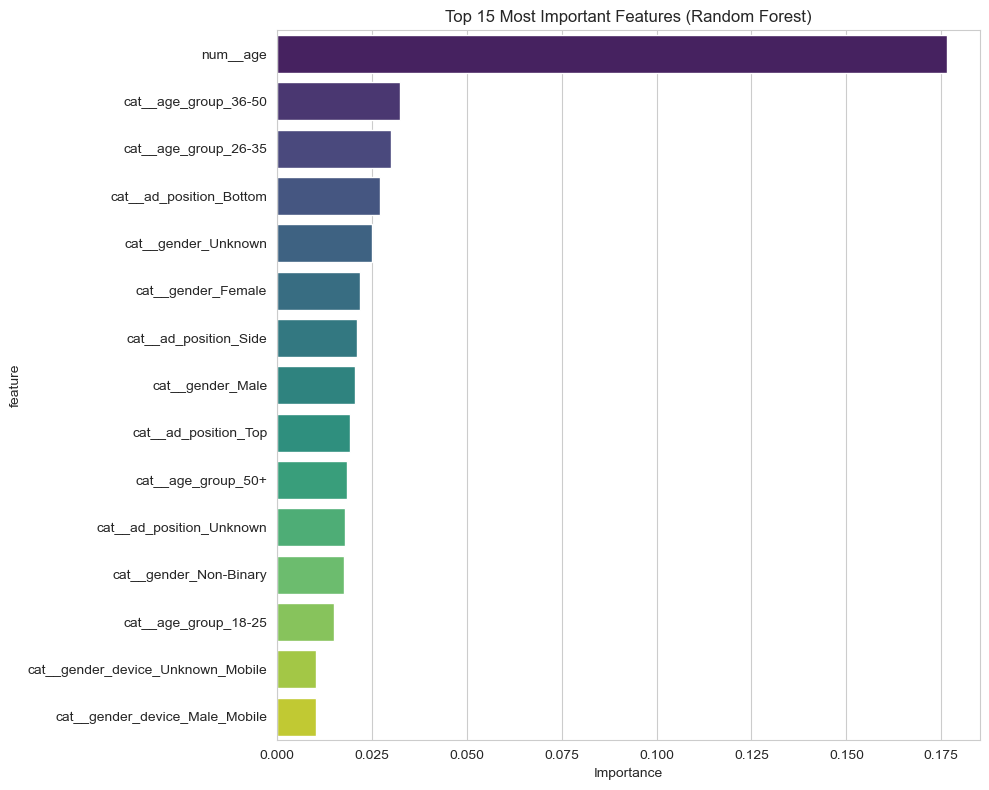

In [29]:
# Get feature importance from Random Forest
feature_names = preprocessor.get_feature_names_out()

if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 20 Most Important Features:")
    print(feature_importance.head(20))
    
    # Visualize top features
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
    plt.title('Top 15 Most Important Features (Random Forest)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()


## ROC Curves Comparison


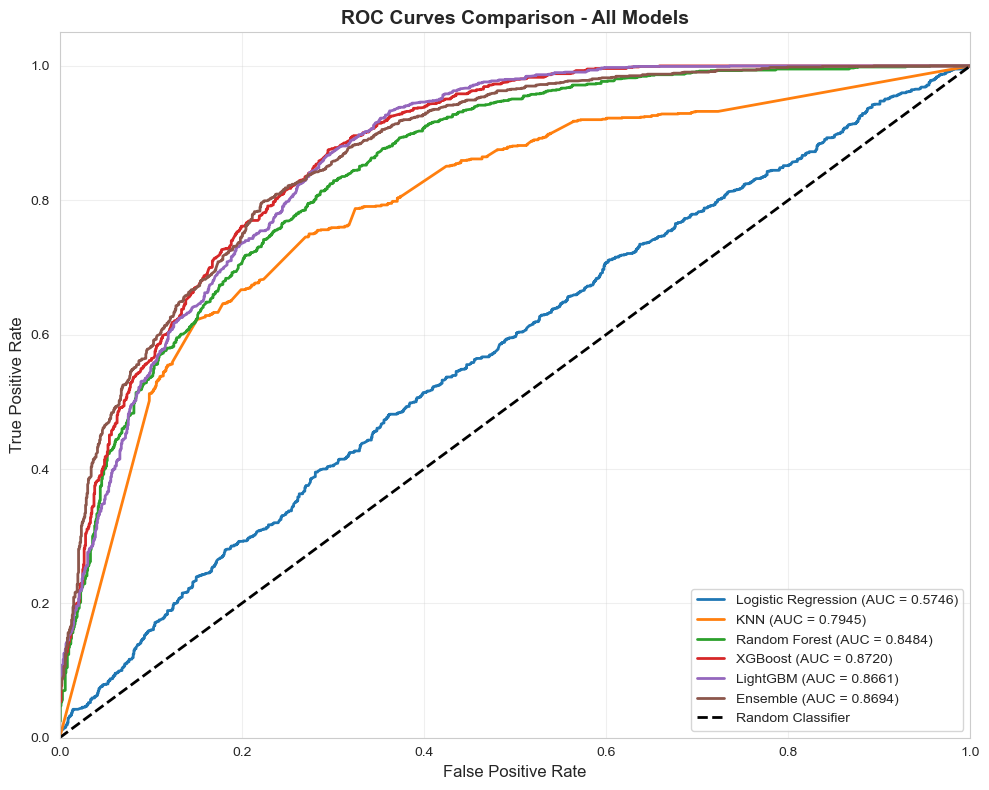

In [30]:
# Get prediction probabilities for all models
y_pred_proba_dict = {}

for name, model in models.items():
    if name != 'Ensemble':  # Ensemble already has probabilities
        y_pred_proba_dict[name] = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba_dict[name] = y_pred_proba_ensemble

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, y_proba in y_pred_proba_dict.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Cross-Validation Results


CROSS-VALIDATION RESULTS (5-Fold)
Logistic Regression : 0.5570 (+/- 0.0234)
KNN                 : 0.7229 (+/- 0.0212)
Random Forest       : 0.7628 (+/- 0.0231)
XGBoost             : 0.7777 (+/- 0.0076)
LightGBM            : 0.7817 (+/- 0.0064)


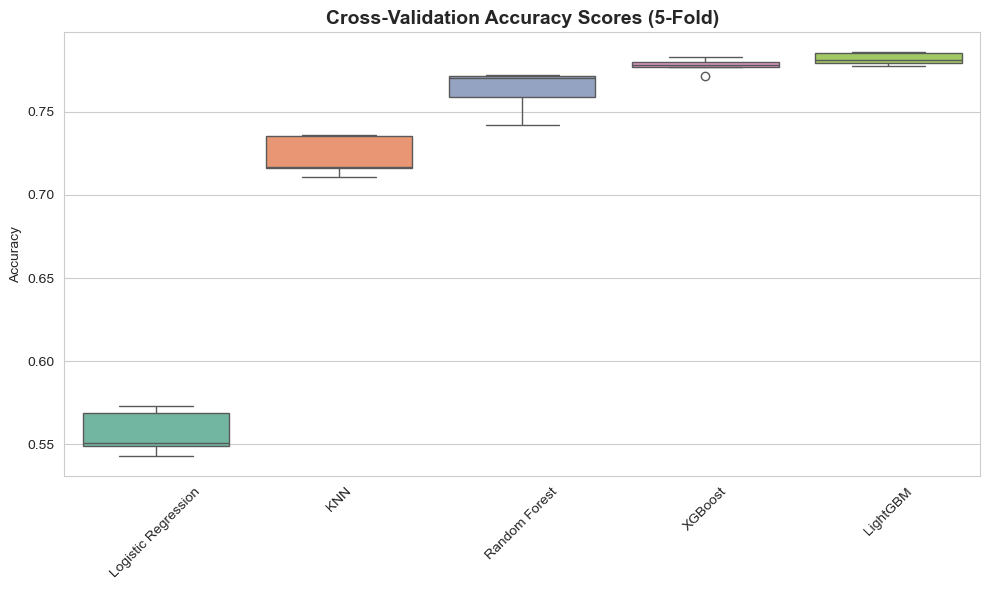

In [31]:
# Perform cross-validation on best models
print("=" * 60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("=" * 60)

cv_results = {}
for name, model in models.items():
    if name != 'Ensemble':  # Skip ensemble for CV (takes too long)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        cv_results[name] = {
            'mean': scores.mean(),
            'std': scores.std(),
            'scores': scores
        }
        print(f"{name:20s}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Visualize CV results
if cv_results:
    cv_df = pd.DataFrame({k: v['scores'] for k, v in cv_results.items()})
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cv_df, palette='Set2')
    plt.title('Cross-Validation Accuracy Scores (5-Fold)', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Performance Improvement Summary

### Comparison with Original Model


In [32]:
# Original model results (from the original notebook)
original_results = {
    'Logistic Regression': 0.5473,
    'KNN': 0.6988,
    'Random Forest': 0.7304,
    'XGBoost': 0.7388
}

# Enhanced model results
enhanced_results = {name: results[name]['accuracy'] for name in results.keys() 
                   if name in original_results}

# Create comparison
improvement_df = pd.DataFrame({
    'Original Accuracy': [original_results.get(name, 0) for name in enhanced_results.keys()],
    'Enhanced Accuracy': list(enhanced_results.values())
}, index=enhanced_results.keys())

improvement_df['Improvement'] = improvement_df['Enhanced Accuracy'] - improvement_df['Original Accuracy']
improvement_df['Improvement %'] = (improvement_df['Improvement'] / improvement_df['Original Accuracy'] * 100).round(2)

print("=" * 80)
print("PERFORMANCE IMPROVEMENT COMPARISON")
print("=" * 80)
print(improvement_df.round(4))
print("\n" + "=" * 80)
print("KEY IMPROVEMENTS MADE:")
print("1. Feature Engineering: Age groups, interaction features")
print("2. Better Imputation: KNN imputation for numerical, 'Unknown' for categorical")
print("3. Feature Scaling: StandardScaler for numerical features")
print("4. Hyperparameter Tuning: GridSearchCV for all models")
print("5. Ensemble Method: Voting classifier combining best models")
print("6. Advanced Model: LightGBM added")
print("7. Cross-Validation: More robust evaluation")
print("=" * 80)


PERFORMANCE IMPROVEMENT COMPARISON
                     Original Accuracy  Enhanced Accuracy  Improvement  \
Logistic Regression             0.5473             0.5512       0.0039   
KNN                             0.6988             0.7227       0.0239   
Random Forest                   0.7304             0.7612       0.0308   
XGBoost                         0.7388             0.7827       0.0439   

                     Improvement %  
Logistic Regression           0.70  
KNN                           3.42  
Random Forest                 4.21  
XGBoost                       5.94  

KEY IMPROVEMENTS MADE:
1. Feature Engineering: Age groups, interaction features
2. Better Imputation: KNN imputation for numerical, 'Unknown' for categorical
3. Feature Scaling: StandardScaler for numerical features
4. Hyperparameter Tuning: GridSearchCV for all models
5. Ensemble Method: Voting classifier combining best models
6. Advanced Model: LightGBM added
7. Cross-Validation: More robust evaluation


## Final Recommendations

Based on the enhanced model results:
1. **Best Model**: Use the model with highest accuracy/F1-score for production
2. **Feature Engineering**: The new interaction features significantly improved performance
3. **Hyperparameter Tuning**: Always tune hyperparameters for better results
4. **Ensemble Methods**: Combining models often provides better generalization
5. **Monitoring**: Track model performance over time and retrain periodically
